In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import re
from os import walk
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tool import *

In [3]:
# aspect setting
asp_dict = pd.read_pickle('../data/setting/aspect.pkl')    
pdir = "../model_result" # /history 
Score = "F1_score" # Loss F1_score

In [3]:
baseline_5 
textGCN 
TGCN
==========
baseline_10
textGCN_10
TGCN_10
==========
baseline_10
textGCN_gen
TGCN_gen

SyntaxError: invalid syntax (3238503451.py, line 4)

In [ ]:

73 / 80

# AMAZON

_baseline_10      0.730979	0.807117
_textGCN_g1_s5_gen_pos_m1 0.727058	0.800503
_TGCN_g2_s2_gen_pos_m1  0.738896	0.807601


# # YELP
#                   aspect.   sentiment
# _baseline_10      0.5226	0.7572	
# _textGCN_g1_s2_m1 0.533022	0.788947 what about it's pos?
# _textGCN_g1_s2_gen_pos_m1 0.5046	0.7935	
# _TGCN_g1_s6_gen_pos_m1   0.562673	0.795618


文字說明的地方要改（參數設定什麼的）
加上最後會選pos
加上兩邊一起計算的準確率
說明為什麼不是最好（會需要說明嗎？），兩邊取捨的過程

減少epoch
設定loss小於條件
遞迴的調整權重？

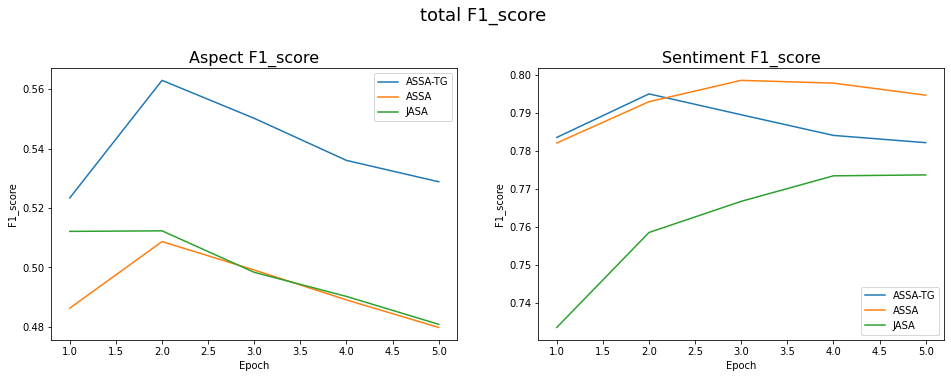

In [4]:
# 三或五應該都可以

domain = 'YELP'
# domain = 'AMAZON'

mver_l = [
                        
#             # AMAZON
            # f'{domain}_TGCN_g2_s2_gen_pos_m1', # OK        
            # f'{domain}_textGCN_g1_s5_gen_pos_m1', # OK    
            # f'{domain}_baseline_10',
    
            # f'{domain}_TGCN_g2_s1_gen_pos_m1', # OK    
            # f'{domain}_TGCN_g2_s3_gen_pos_m1', # OK    
            # f'{domain}_TGCN_g2_s5_gen_pos_m1', # OK    
            # f'{domain}_textGCN_g1_s3_gen_pos_m1', # OK    太高
            # f'{domain}_textGCN_g1_s1_gen_pos_m1', # OK    
    

            # # YELP avg of 5 rounds
            f'{domain}_TGCN_g1_s6_gen_pos_m1', # # 需要再一輪取平均        
            f'{domain}_textGCN_g1_s2_gen_pos_m1', # OK    
            f'{domain}_baseline_10', # 需要再一輪取平均
            # # f'{domain}_textGCN_g1_s2_m1', # old

] 
Round_total = 5
epoch_filter = None
title = 'total'

# 畫出列表中的模型結果
all_data =  read_mverlist(mver_l,Round_total,pdir, epoch_filter)
all_data = all_data[all_data['Epoch'] <= 5]

labels = ['ASSA-TG','ASSA','JASA']
# labels = None
plot_result_list(all_data, Score, mver_l, title, labels)

plt.savefig(f'{domain}_f1-score.png',edgecolor='none')

In [14]:
all_data[all_data['Epoch']==3][['Epoch','AF1_score','SF1_score','name']].round(4)

# all_data[all_data['Epoch']==3][['Epoch','AF1_score','SF1_score']]*100

# 3
# T    0.5502	0.7895
# text 0.4991	0.7985

# 2
# 0.5629	0.7950
# 0.5087	0.7929

,Epoch,AF1_score,SF1_score,name
2,3,0.7425,0.8090,AMAZON_TGCN_g2_s2_gen_pos_m1
2,3,0.7417,0.7913,AMAZON_textGCN_g1_s5_gen_pos_m1
2,3,0.7315,0.8066,AMAZON_baseline_10


In [36]:
all_data[all_data['Epoch']==3][['Epoch','AF1_score','SF1_score','name']]

,Epoch,AF1_score,SF1_score,name
2,3,0.492849,0.800194,YELP_textGCN_g1_s2_gen_pos_m1


In [110]:
sel = all_data[all_data['name']=='sent_AMAZON_baseline']

In [111]:
all_data[all_data['SF1_score']==all_data['SF1_score'].max()]\
[['Epoch','AF1_score','SF1_score','name']]

,Epoch,AF1_score,SF1_score,name
4,5,0.467602,0.779412,YELP_sent_baseline_10


In [18]:
# aspect
(all_data[all_data['Epoch']==3][['AAccuracy', 'APrecision', 'ARecall','AF1_score']] * 100).round(2)

,AAccuracy,APrecision,ARecall,AF1_score
2,74.43,74.34,74.85,74.25
2,74.18,74.98,74.08,74.17
2,73.25,74.12,72.84,73.15


In [20]:
# sentiment
(all_data[all_data['Epoch']==3][['SAccuracy', 'SPrecision', 'SRecall','SF1_score']] * 100).round(2)

,SAccuracy,SPrecision,SRecall,SF1_score
2,81.44,80.58,81.68,80.90
2,79.84,78.76,80.30,79.13
2,81.15,80.39,81.24,80.66


In [65]:
# all_data[all_data['Epoch']==30][['name','AF1_score','SF1_score']]
# all_data[all_data['Epoch']==30][['name','AF1_score','SF1_score']]

### seed 長什麼樣

In [ ]:
# YELP_textGCN YELP_JASA_w1 TGCN_0.3_v10 ASSA_LAPTOP

In [105]:
mver = 'ASSA-GT_REST' 
dataset = 'YELP'
path = f'../seed/{dataset}/doc/{mver}/GCN_seed_R'
# path = f'../model_result/{mver}/GCN_seed_R'

seed_df = seeds_to_df(path,1,dataset,5,True, asp_dict)
seed_df['seeds_str'] = seed_df.apply(lambda row: join_list(row['seeds']), axis=1)

seed_df[['aspect','sentiment','seeds_str']].sort_values(['aspect'])

,aspect,sentiment,seeds_str
0,AMB,pos,delicious staff friendly always restaurant
5,AMB,neg,cold tampa nola wish even
1,DRI,pos,coffee made ask interesting grits
6,DRI,neg,list flatbread worth say priced
2,FOD,pos,also fresh delicious recommend definitely
7,FOD,neg,horrible problem disappointing hair buy
3,LOC,pos,num geno pat place gross
8,LOC,neg,horrible problem disappointing buy cold
4,SRV,pos,friendly definitely highly knowledgeable sugge...
9,SRV,neg,horrible problem disappointing hair buy


In [17]:
fseed = open(f'../seed/asp/asp_seeds_AMAZON.txt', 'r')
' '.join(list(fseed)).replace(':0.9','').replace('\n','').split(' ')



['service',
 'warranty',
 'coverage',
 'replace',
 'support',
 'windows',
 'ios',
 'mac',
 'system',
 'os',
 'screen',
 'led',
 'monitor',
 'resolution',
 'display',
 'life',
 'charge',
 'last',
 'power',
 'battery',
 'hp',
 'toshiba',
 'dell',
 'lenovo',
 'company',
 'touch',
 'track',
 'button',
 'pad',
 'mouse',
 'programs',
 'apps',
 'itunes',
 'photoshop',
 'software',
 'key',
 'space',
 'type',
 'keys',
 'keyboard']

In [41]:
prob_df =  pd.read_csv(f'../model_result/{mver}/R1_testl.csv')
prob_df.columns = ['aspect','mask','pos','neg'] # ['aspect','word','pos','neg']

#### 驗算維度

In [ ]:
x.shape, y.shape, tx.shape, ty.shape, allx.shape, ally.shape
(10, 300) (10, 2) (9795, 300) (9795, 2) (4830, 300) (4830, 2)

In [ ]:
unit: word
train: 10
test: 9795
doc: 4820

allx: train + doc = 10 + 4820 = 4830
vocab_list = train + test = 10 + 9795 = 9805
oup = allx + tx = (train + doc) + test = (10+4820) + 9795 = 14625

In [ ]:
x.shape, y.shape, tx.shape, ty.shape, allx.shape, ally.shape
(10, 300) (10, 2) (9789, 300) (9789, 2) (4836, 300) (4836, 2)

allx = train + doc = (10+6) + 4820


In [ ]:
test:
max 14624
min 4830


seedi max 9804
seedi min 10
seedi length 9795